
# Análisis de Frecuencias de Texto


In [1]:

# Librerías
import unicodedata
import re
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
def preprocess_text(text):
    import unicodedata
    import re

    # 1. Minúsculas
    text = text.lower()

    # 2. Quitar acentos
    text = unicodedata.normalize('NFD', text)
    text = ''.join(c for c in text if unicodedata.category(c) != 'Mn')

    # 3. Quitar explícitamente los caracteres solicitados (regex del enunciado)
    chars_to_remove = r'[;:,.\"\'/()\[\]¿?¡!{}~<>|«»-—’\\-]'
    text = re.sub(chars_to_remove, ' ', text)

    # 4. Quitar cualquier otra puntuación Unicode restante
    text = ''.join(
        c if not unicodedata.category(c).startswith('P') else ' '
        for c in text
    )

    # 5. Reemplazar tabs y saltos de línea
    text = text.replace('\n', ' ').replace('\t', ' ')

    # 6. Normalizar espacios
    text = re.sub(r'\s+', ' ', text)

    return text.strip()


In [3]:

# Cargar archivos
files = {
    "libro_1": "/mnt/c/Users/Javier/Desktop/MCDI/2026_1_manejo_procesamiento_informacion/data/1B_texts/libro_1.txt",
    "libro_2": "/mnt/c/Users/Javier/Desktop/MCDI/2026_1_manejo_procesamiento_informacion/data/1B_texts/libro_2.txt"
}

texts = {}
for name, path in files.items():
    with open(path, encoding='utf-8') as f:
        texts[name] = preprocess_text(f.read())


In [4]:

# Calcular frecuencias
frequencies = {}
for name, text in texts.items():
    words = text.split()
    frequencies[name] = Counter(words)


In [5]:

# Análisis básico
for name, freq in frequencies.items():
    total_words = sum(freq.values())
    unique_words = len(freq)
    hapax = sum(1 for w, c in freq.items() if c == 1)
    
    print(f"--- {name} ---")
    print(f"Total de palabras: {total_words}")
    print(f"Palabras únicas: {unique_words}")
    print(f"Hapax legomena: {hapax}\n")


--- libro_1 ---
Total de palabras: 57247
Palabras únicas: 7415
Hapax legomena: 4315

--- libro_2 ---
Total de palabras: 50997
Palabras únicas: 8132
Hapax legomena: 4837



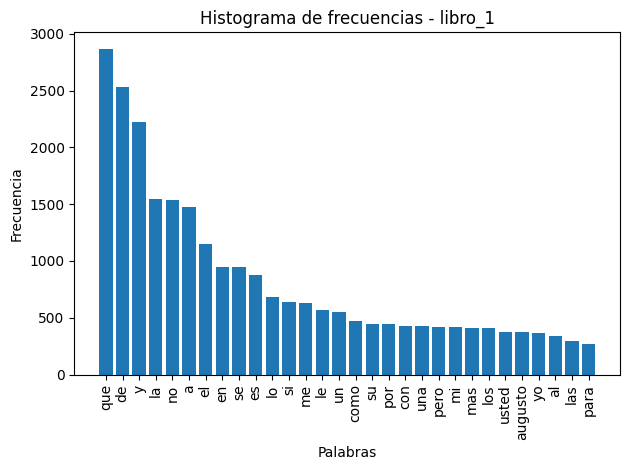

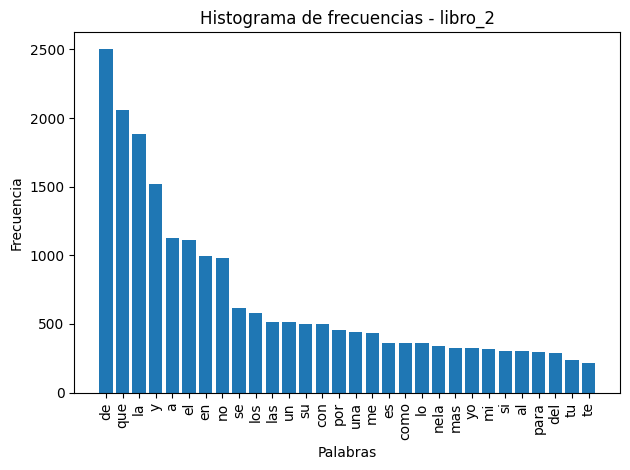

In [6]:

# Histogramas de frecuencia (Top N palabras)
TOP_N = 30

for name, freq in frequencies.items():
    most_common = freq.most_common(TOP_N)
    words, counts = zip(*most_common)
    
    plt.figure()
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.title(f"Histograma de frecuencias - {name}")
    plt.ylabel("Frecuencia")
    plt.xlabel("Palabras")
    plt.tight_layout()
    plt.show()
